[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


                  AAPL        MSFT       DELL     ET
Date                                                
2023-10-02  173.750000  321.799988  67.699997  13.78
2023-10-03  172.399994  313.390015  67.239998  13.55
2023-10-04  173.660004  318.959991  67.199997  13.34
2023-10-05  174.910004  319.359985  66.190002  13.36
2023-10-06  177.490005  327.260010  66.410004  13.46


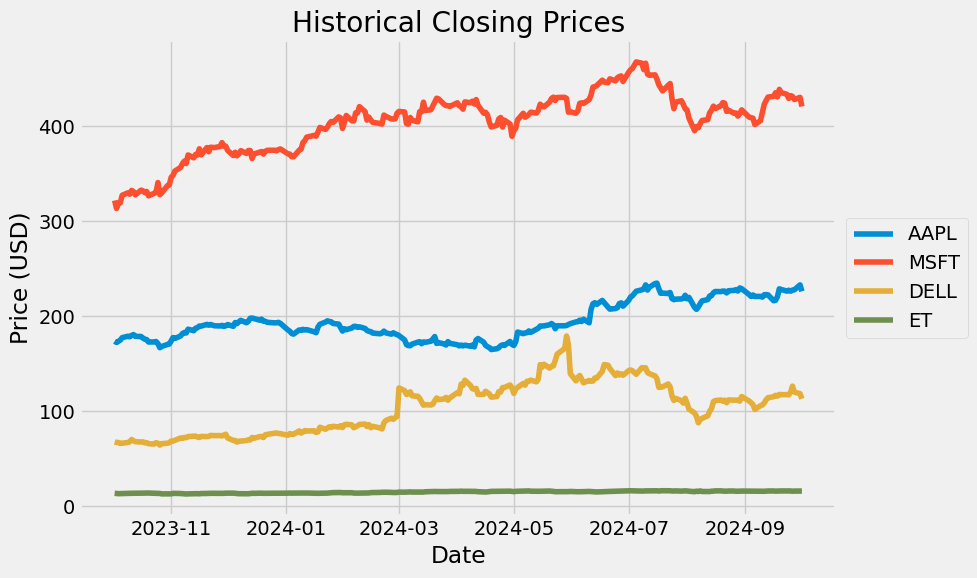

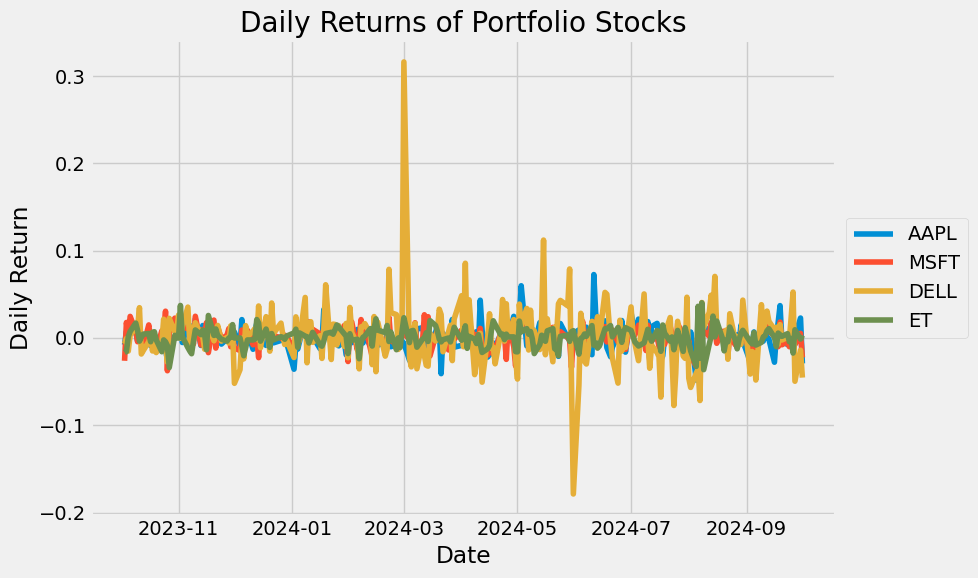

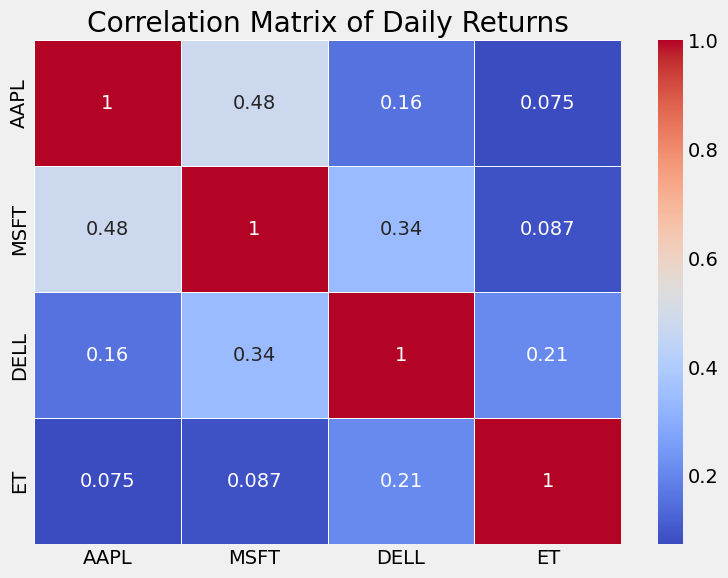

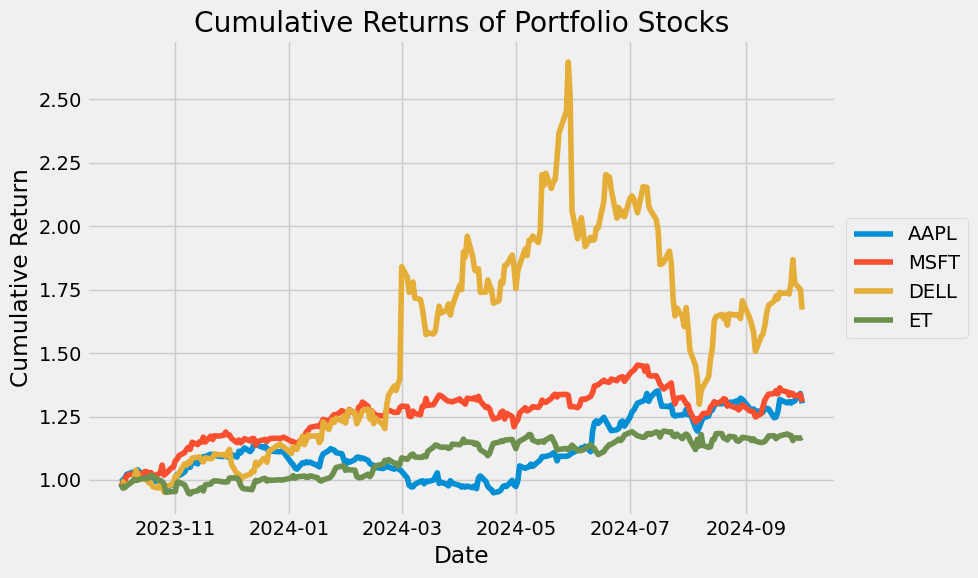


Risk and Return Metrics:
      Annualized Return  Annualized Volatility  Sharpe Ratio
AAPL           0.290039               0.224657      1.291027
MSFT           0.288767               0.198043      1.458107
DELL           0.673154               0.573048      1.174691
ET             0.171007               0.172081      0.993759


C:\Users\nilee\AppData\Local\Temp\ipykernel_19680\2066084346.py:106: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (risk_return_df["Annualized Volatility"][i], risk_return_df["Annualized Return"][i]), fontsize=12)


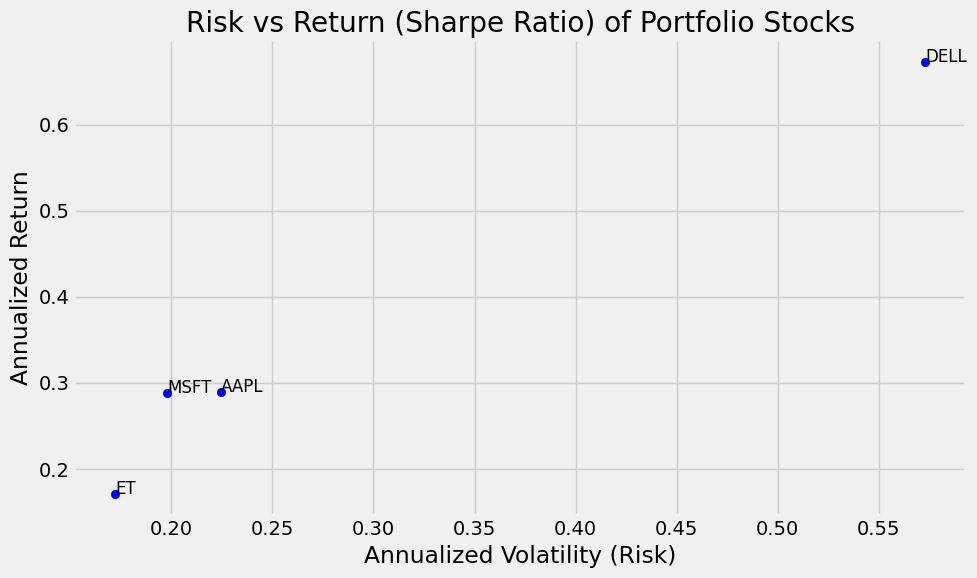

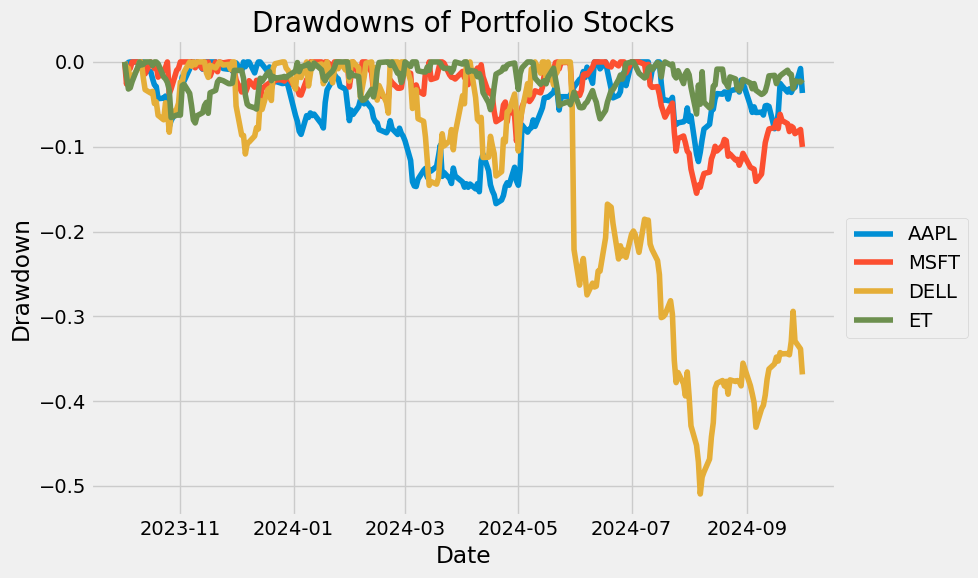


Maximum Drawdowns for Each Stock:
AAPL   -0.167129
MSFT   -0.154868
DELL   -0.509570
ET     -0.071989
dtype: float64


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import yfinance as yf
from datetime import date

plt.style.use('fivethirtyeight')  # Setting matplotlib style

# Function to fetch historical close prices for a given ticker
def get_close_data(ticker, period="1y"):
    """
    Fetches the closing prices for a given stock ticker and returns it as a pandas DataFrame
    with the 'Close' column renamed to the ticker symbol.

    Parameters:
    ticker (str): The stock ticker symbol.
    period (str): The period over which to download the data (default is '1y').

    Returns:
    pd.DataFrame: DataFrame with the renamed 'Close' column.
    """
    data = yf.download(ticker, period=period)  # Download data for the given period
    close_data = data['Close']  # Extract the 'Close' column
    close_df = pd.DataFrame(close_data).rename(columns={"Close": ticker})  # Rename 'Close' to ticker symbol
    return close_df

# Fetch data for multiple tickers
tickers = ["AAPL", "MSFT", "DELL", "ET"]
portfolio_data = [get_close_data(ticker) for ticker in tickers]

# Concatenate the ticker DataFrames
df_portfolio = pd.concat(portfolio_data, axis=1)

# Display sample data
print(df_portfolio.head())

# Plot historical prices for multiple stocks
plt.figure(figsize=(10, 6))
plt.plot(df_portfolio)
plt.title("Historical Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend(df_portfolio.columns, loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate daily returns
daily_returns = df_portfolio.pct_change().dropna()

# Plot daily returns
plt.figure(figsize=(10, 6))
plt.plot(daily_returns)
plt.title("Daily Returns of Portfolio Stocks")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend(daily_returns.columns, loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation analysis
plt.figure(figsize=(8, 6))
sb.heatmap(daily_returns.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Daily Returns")
plt.tight_layout()
plt.show()

# Cumulative returns
cumulative_returns = (1 + daily_returns).cumprod()

# Plot cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns)
plt.title("Cumulative Returns of Portfolio Stocks")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend(cumulative_returns.columns, loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

# Risk and Return Analysis
mean_daily_returns = daily_returns.mean()
annualized_returns = mean_daily_returns * 252
annualized_volatility = daily_returns.std() * np.sqrt(252)

# Create a DataFrame for risk and return metrics
risk_return_df = pd.DataFrame({
    "Annualized Return": annualized_returns,
    "Annualized Volatility": annualized_volatility
})

# Calculate Sharpe Ratio (Assume risk-free rate = 0 for simplicity)
risk_return_df["Sharpe Ratio"] = risk_return_df["Annualized Return"] / risk_return_df["Annualized Volatility"]

# Display risk and return metrics
print("\nRisk and Return Metrics:")
print(risk_return_df)

# Plot risk vs return
plt.figure(figsize=(10, 6))
plt.scatter(risk_return_df["Annualized Volatility"], risk_return_df["Annualized Return"], c='blue', marker='o')
for i, txt in enumerate(risk_return_df.index):
    plt.annotate(txt, (risk_return_df["Annualized Volatility"][i], risk_return_df["Annualized Return"][i]), fontsize=12)
plt.xlabel('Annualized Volatility (Risk)')
plt.ylabel('Annualized Return')
plt.title('Risk vs Return (Sharpe Ratio) of Portfolio Stocks')
plt.grid(True)
plt.tight_layout()
plt.show()

# Maximum Drawdown Analysis
rolling_max = df_portfolio.cummax()  # Calculate rolling maximum
drawdown = (df_portfolio / rolling_max) - 1  # Calculate drawdown
max_drawdown = drawdown.min()  # Calculate the maximum drawdown

# Plot drawdowns
plt.figure(figsize=(10, 6))
plt.plot(drawdown)
plt.title("Drawdowns of Portfolio Stocks")
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.legend(drawdown.columns, loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

# Display maximum drawdown values
print("\nMaximum Drawdowns for Each Stock:")
print(max_drawdown)
